## Heart Disease Prediction using python's Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
heart_d=pd.read_csv(r'C:\Users\Manjunath\heart_disease_dataset.csv')

In [3]:
heart_d.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
heart_d.shape

(303, 14)

In [5]:
heart_d[heart_d.age>0].shape

(303, 14)

In [6]:
heart_d.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [7]:
heart_d.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [8]:
np.isnan(heart_d).any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [9]:
heart_d[(heart_d['cp']>=1) & (heart_d['cp']<=4)].shape

(303, 14)

In [10]:
heart_d[(heart_d['trestbps']>=60) & (heart_d['trestbps']<=200)].shape

(303, 14)

In [11]:
heart_d[heart_d.fbs==1].shape

(45, 14)

In [12]:
heart_d[heart_d.fbs==0].shape

(258, 14)

In [13]:
heart_d[(heart_d.restecg>=0) & (heart_d.restecg<=2)].shape

(303, 14)

In [14]:
heart_d[heart_d.thalach<220].shape

(303, 14)

In [15]:
heart_d[(heart_d.slope>=1) &(heart_d.slope<=3)].shape

(303, 14)

In [16]:
heart_d[(heart_d.ca>=0) & (heart_d.ca<=3)].shape

(299, 14)

In [17]:
for item in heart_d.ca:
    if item<0:
        heart_d['ca']=heart_d['ca'].replace(item,np.nan)

In [18]:
heart_d['ca'].fillna(heart_d['ca'].median(),inplace=True)

In [19]:
heart_d.ca=heart_d.ca.astype(int)

In [20]:
heart_d[(heart_d.thal==3) | (heart_d.thal==6) | (heart_d.thal==7)].shape

(301, 14)

In [21]:
for item in heart_d.thal:
    if item<0:
        heart_d.thal=heart_d.thal.replace(item,np.nan)

In [22]:
heart_d['thal'].fillna(heart_d['thal'].median(),inplace=True)

In [23]:
heart_d.thal=heart_d.thal.astype(int)

In [24]:
heart_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [25]:
heart_d.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


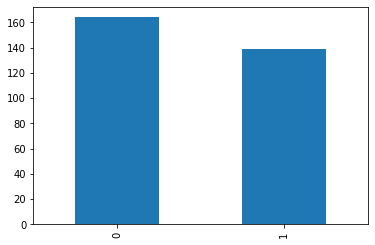

In [26]:
heart_d['num'].value_counts().plot(kind='bar')
plt.show()

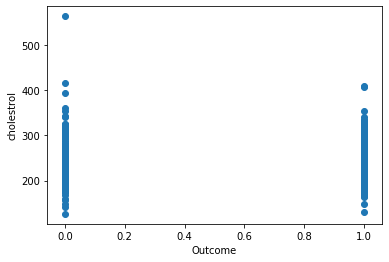

In [27]:
plt.scatter(x='num',y='chol', data=heart_d)
plt.xlabel('Outcome')
plt.ylabel('cholestrol')
plt.show()

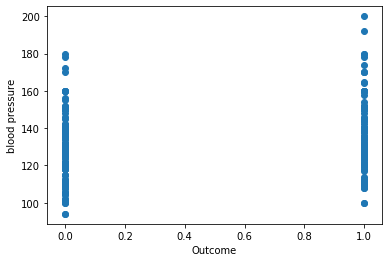

In [28]:
plt.scatter(x='num',y='trestbps',data=heart_d)
plt.xlabel('Outcome')
plt.ylabel('blood pressure')
plt.show()

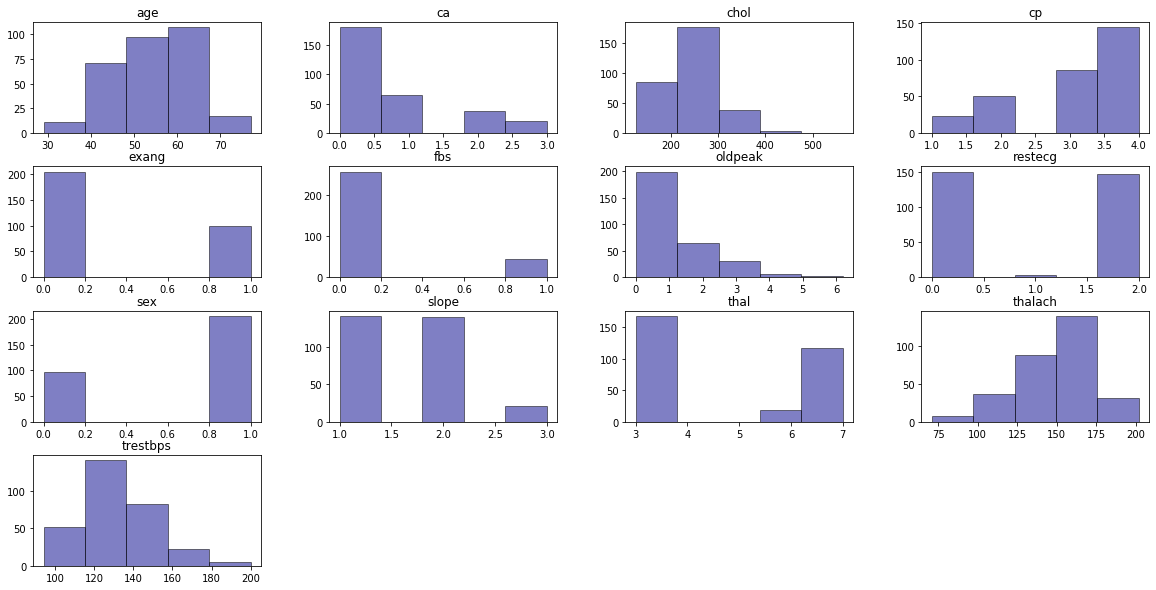

In [29]:
heart_d.iloc[:,:-1].hist(bins=5,figsize=(20,10),grid=False,edgecolor='black',alpha=0.5,color='darkblue')
plt.show()

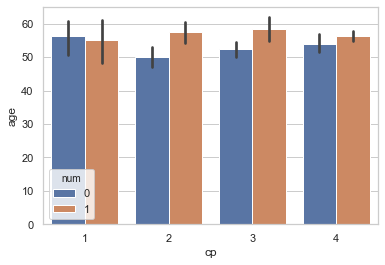

In [30]:
sns.set(style="whitegrid")
ax = sns.barplot(x="cp", y="age",hue='num', data=heart_d)

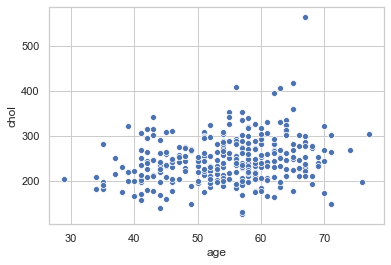

In [31]:
sns.scatterplot(x='age',y='chol',data=heart_d)

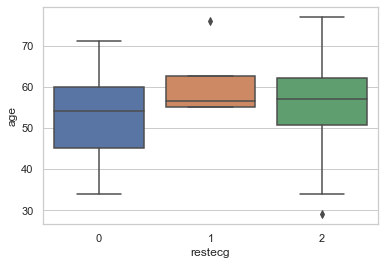

In [32]:
sns.boxplot(x='restecg',y='age',data=heart_d)

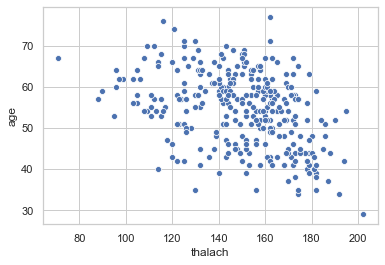

In [33]:
sns.scatterplot(x='thalach',y='age',data=heart_d)

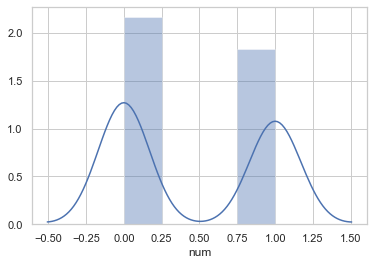

In [34]:
sns.distplot(heart_d.num)

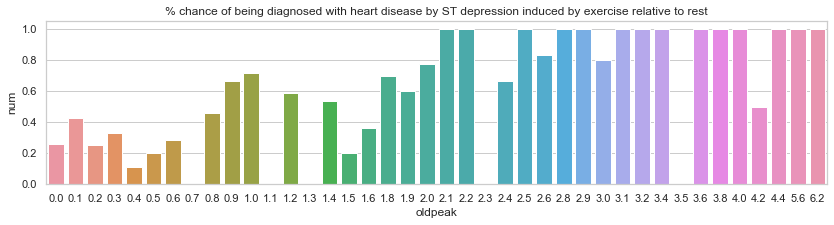

In [35]:
plt.figure(figsize=(14,3))
oldpeak_pivot=heart_d.groupby('oldpeak').num.mean().reset_index()
sns.barplot(oldpeak_pivot.oldpeak,oldpeak_pivot.num)
plt.title('% chance of being diagnosed with heart disease by ST depression induced by exercise relative to rest')
plt.show()

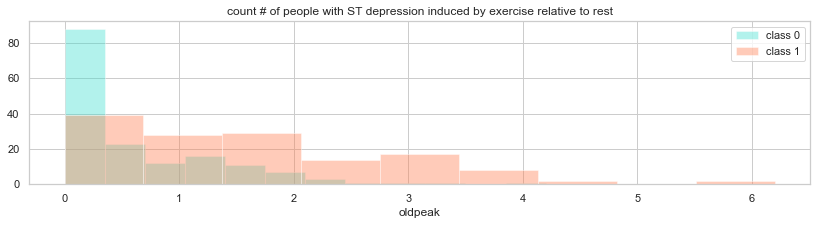

In [36]:
plt.figure(figsize=(14,3))
oldpeak_pivot=heart_d.groupby('oldpeak').num.count().reset_index()
sns.distplot(heart_d[heart_d.num==0]['oldpeak'],color='turquoise',kde=False,label='class 0')
sns.distplot(heart_d[heart_d.num==1]['oldpeak'],color='coral',kde=False,label='class 1')
plt.legend()
plt.title('count # of people with ST depression induced by exercise relative to rest')
plt.show()

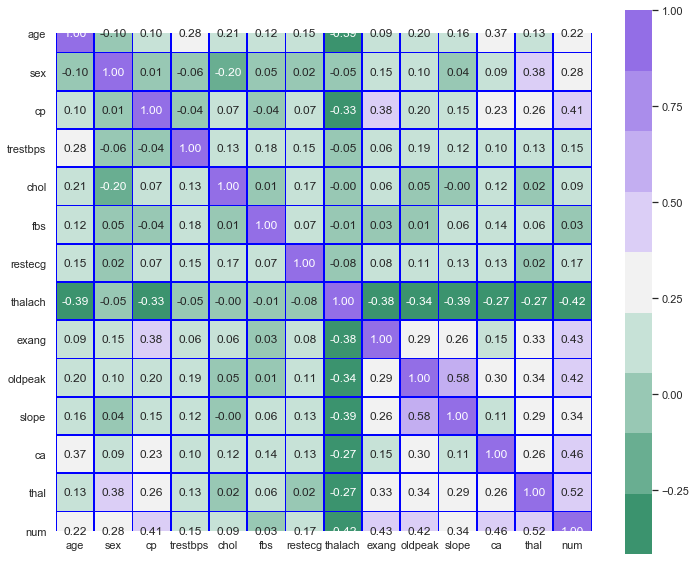

In [37]:
f,ax=plt.subplots(figsize=(12,10))
cmap=sns.diverging_palette(150,275,s=80,l=55,n=9)
sns.heatmap(heart_d.corr(),annot=True,annot_kws={'size':12},linewidth=.8,linecolor='blue',fmt='.2f',ax=ax,square=True,cmap=cmap)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import  roc_auc_score, roc_curve

In [39]:
feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X=heart_d[feature_cols]
y=heart_d.num

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=150)

results for logistic_regression:

Accuracy:  92.3076923076923

classification report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.90      0.93      0.92        41

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

confusion matrix:

[[46  4]
 [ 3 38]]


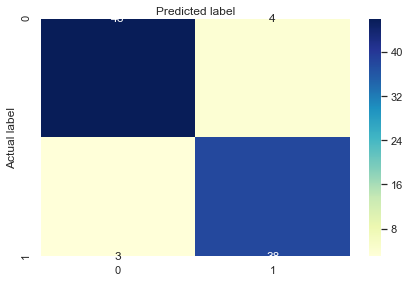


ROC_AUC_SCORE is :  0.9234146341463415


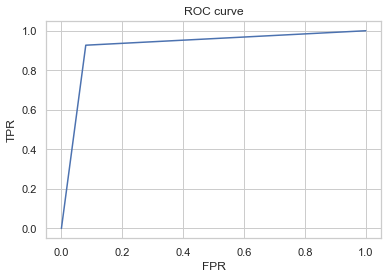

results for decision_tree:

Accuracy:  74.72527472527473

classification report:

              precision    recall  f1-score   support

           0       0.85      0.66      0.74        50
           1       0.67      0.85      0.75        41

    accuracy                           0.75        91
   macro avg       0.76      0.76      0.75        91
weighted avg       0.77      0.75      0.75        91

confusion matrix:

[[33 17]
 [ 6 35]]


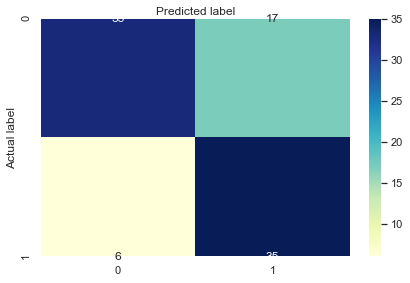


ROC_AUC_SCORE is :  0.7568292682926828


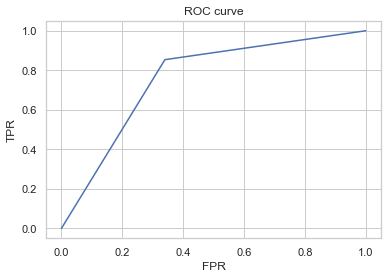

results for random_forest:

Accuracy:  84.61538461538461

classification report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        50
           1       0.81      0.85      0.83        41

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

confusion matrix:

[[42  8]
 [ 6 35]]


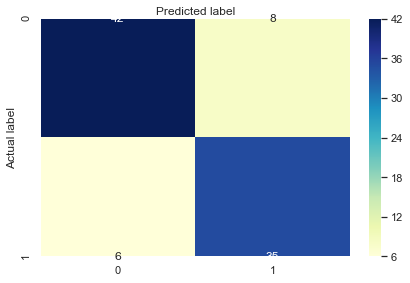


ROC_AUC_SCORE is :  0.8468292682926828


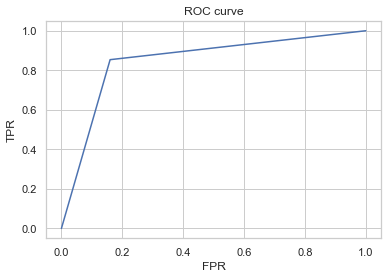

results for gradient_boosting:

Accuracy:  85.71428571428571

classification report:

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        50
           1       0.83      0.85      0.84        41

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

confusion matrix:

[[43  7]
 [ 6 35]]


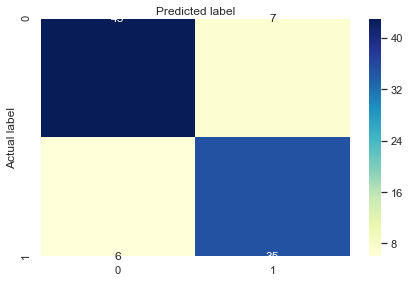


ROC_AUC_SCORE is :  0.8568292682926829


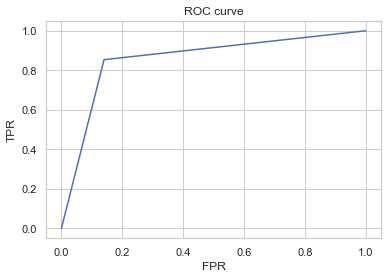

In [41]:
def experiments():
    models_dict={'logistic_regression':LogisticRegression(),
                 'decision_tree':DecisionTreeClassifier(),
                 'random_forest':RandomForestClassifier(n_estimators=40),
                 'gradient_boosting':GradientBoostingClassifier(n_estimators=30)
                }
    for m in models_dict.keys():
        model=models_dict[m]
        model.fit(X_train,y_train)
        y_predicted=model.predict(X_test)
        
        print(f'results for {m}:\n')
        print('Accuracy: ',accuracy_score(y_test,y_predicted)*100)
        
        print('\nclassification report:\n')
        print(classification_report(y_test,y_predicted))
        
        print('confusion matrix:\n')
        cnf_matrix=confusion_matrix(y_test,y_predicted)
        print(cnf_matrix)
        
        fig,ax=plt.subplots()
        sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
        ax.xaxis.set_label_position('top')
        plt.tight_layout()
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        
        auc = roc_auc_score(y_test,y_predicted)
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_predicted)
        print("\nROC_AUC_SCORE is : ",auc)
        plt.plot(false_positive_rate, true_positive_rate)
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.title('ROC curve')
        plt.show()
experiments()

In [42]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [44]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[46,  4],
       [ 3, 38]], dtype=int64)

In [45]:
print("accuracy: ",accuracy_score(y_test,y_pred)*100)
print("precision: ",precision_score(y_test,y_pred)*100)
print("recall: ",recall_score(y_test,y_pred)*100)
print("f1 score: ",f1_score(y_test,y_pred)*100)

accuracy:  92.3076923076923
precision:  90.47619047619048
recall:  92.6829268292683
f1 score:  91.56626506024097


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        50
           1       0.90      0.93      0.92        41

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



ROC_AUC_SCORE is :  0.9234146341463415


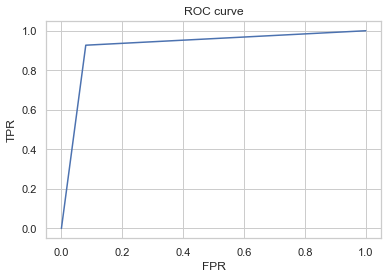

In [47]:
auc = roc_auc_score(y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
print("ROC_AUC_SCORE is : ",auc)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

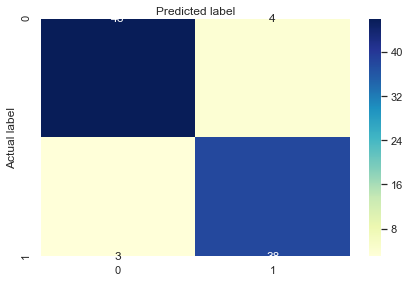

In [48]:
fig,ax=plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()